# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.distributions.constraints import one_hot
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

# Neural network

A general "sequential" neural network can be expressed as:

In [3]:
x, y = torch.load('../data/MNIST/processed/training.pt')
# x is the list of images,
# y is the list of labels

C:\Users\negoi\AppData\Local\Temp\ipykernel_8240\939543997.py:6: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


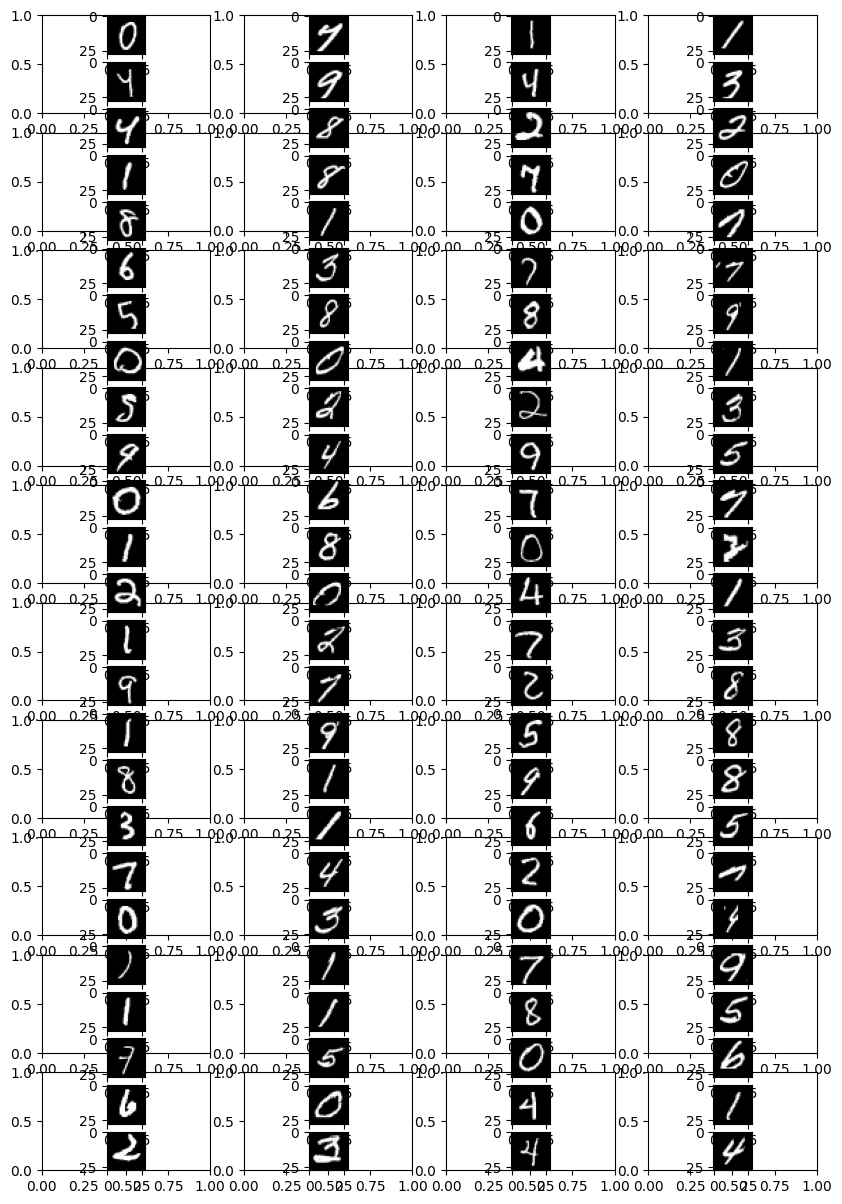

In [7]:
aslice = x[1000:2000]
fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(100):
    plt.subplot(25, 4, i+1)
    plt.imshow(aslice[i], cmap='gray')
fig.tight_layout()
plt.show()

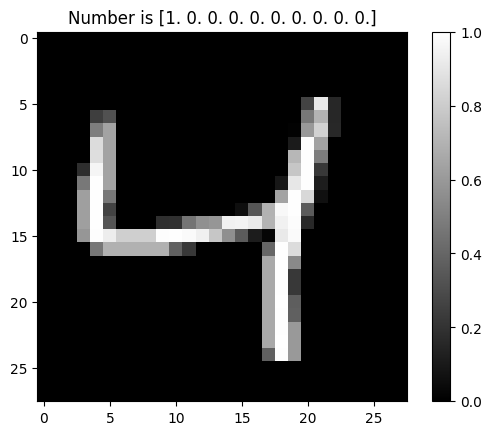

In [114]:
plt.imshow(x[2].numpy(), cmap='gray')
plt.title(f"Number is {y[1].numpy()}")
plt.colorbar()
plt.show()

In [55]:
x[1].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [56]:
y_hot = F.one_hot(y, num_classes=10)

In [57]:
y_hot

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [58]:
x_flattened = x.view(-1, 28**2)

In [59]:
x_flattened.shape

torch.Size([60000, 784])

In [60]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        # x is the list of images,
        # y is the list of labels

        # process a little bit
        self.x = self.x / 255 # normalize
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0] # number of samples
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [61]:
train_ds = CTDataset('../data/MNIST/processed/training.pt')
test_ds = CTDataset('../data/MNIST/processed/test.pt')

In [62]:
xs, ys = test_ds[0:4]

In [63]:
train_dl = DataLoader(train_ds, batch_size=5)

In [64]:
for x, y in train_dl:
    print(x)
    print(y)
    break

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [65]:
len(train_dl)

12000

### Cross entropy function

### The network

In [67]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [68]:
f = MyNeuralNet()

In [73]:
f(xs)

tensor([[-0.0692,  0.0808, -0.0028, -0.1121, -0.0940, -0.0390,  0.1395,  0.1087,
          0.0797, -0.0445],
        [-0.0513,  0.1670, -0.0426, -0.0590, -0.0834,  0.0140,  0.1145,  0.0906,
          0.0907, -0.0176],
        [-0.0693,  0.1491, -0.0289, -0.0396, -0.0624, -0.0471,  0.1176,  0.1325,
          0.0406, -0.0100],
        [-0.0535,  0.1490, -0.0065, -0.1186, -0.1046, -0.0159,  0.0978,  0.0842,
          0.1304, -0.0615]], grad_fn=<SqueezeBackward0>)

In [83]:
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()
            # Store training data
            epochs.append(epoch + i/N)
            losses.append(loss_value.item())

    return np.array(epochs), np.array(losses)

In [84]:
epoch_data, loss_data = train_model(train_dl, f)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


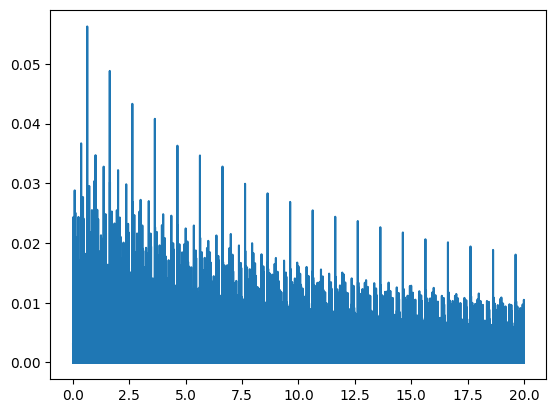

In [85]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entrpy (per batch)')

Text(0.5, 1.0, 'Cross Entrpy (per epoch)')

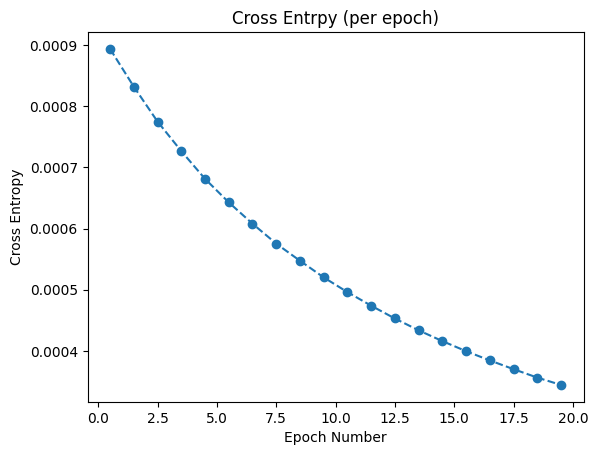

In [87]:
epoch_data_avgd = epoch_data.reshape(20, -1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20, -1).mean(axis=1)
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entrpy (per epoch)')

In [109]:
x_sample = train_ds[0][0]
print(x_sample.shape)
prediction = f(x_sample)
prediction.argmax()

torch.Size([28, 28])


tensor(5)

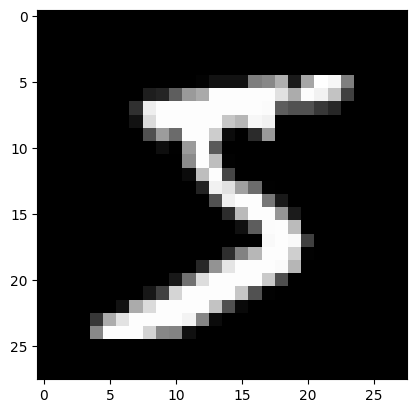

In [113]:
plt.imshow(train_ds[0][0], cmap='gray')

In [91]:
torch.argmax(prediction)

tensor(5)

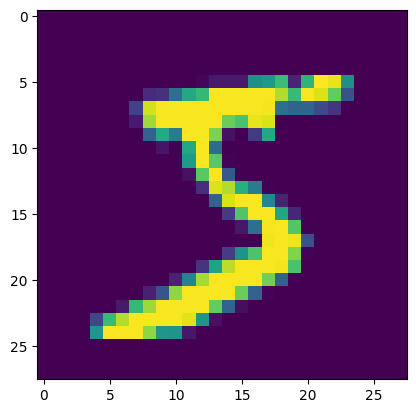

In [92]:
plt.imshow(x_sample)

In [94]:
xs, ys = train_ds[:100]
yhats = f(xs).argmax(axis=1)

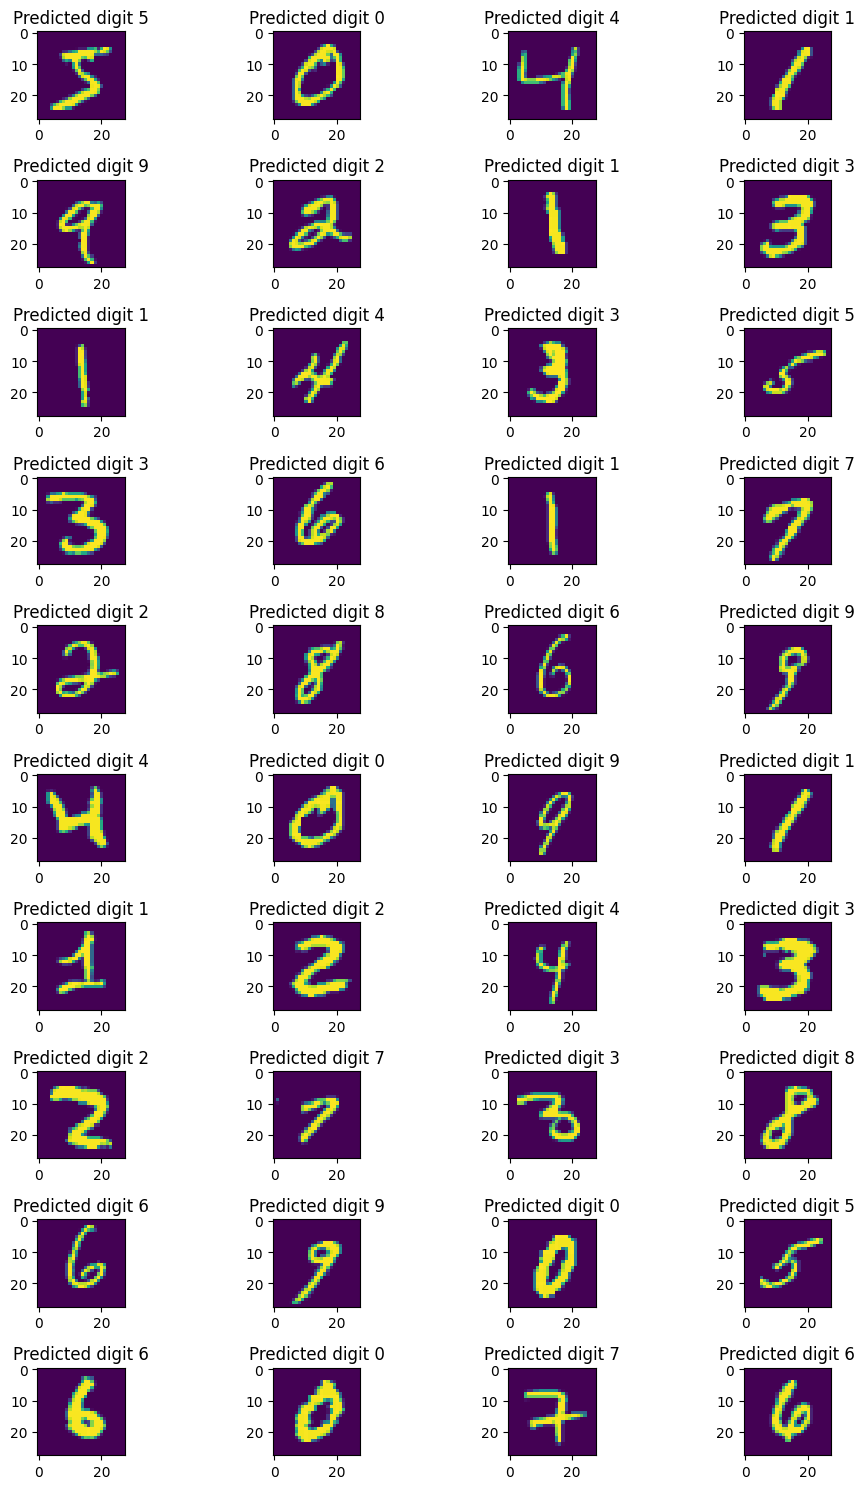

In [95]:
fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(xs[i])
    plt.title(f"Predicted digit {yhats[i]}")
fig.tight_layout()
plt.show()

In [99]:
xs, ys = test_ds[1000:2000]
yhats = f(xs).argmax(axis=1)

In [1]:
fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(100):
    plt.subplot(10, 4, i+1)
    plt.imshow(xs[i], cmap='gray')
    plt.title(f"Predicted digit {yhats[i]}")
fig.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [101]:
torch.save(f.state_dict(), 'models/model.pth')

In [ ]:
obj = {
    'nume':vv
}